In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

2025-03-11 15:07:26.495598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load dataset
df = pd.read_csv('sentiment_dataset.csv')

In [15]:
df.head()

,text,label
0,I hate it. Total waste of money.,0
1,It's decent but nothing special.,1
2,"It's okay, not great but not bad.",1
3,Excellent quality and great support!,2
4,This is the best thing I've ever bought!,2


In [3]:
# Encode labels
label_map = {"positive": 2, "neutral": 1, "negative": 0}
df["label"] = df["label"].map(label_map)

In [4]:
label_map

{'positive': 2, 'neutral': 1, 'negative': 0}

In [5]:
# Tokenize text
max_words = 5000  # Vocabulary size
max_len = 100  # Max sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"])
sequences = tokenizer.texts_to_sequences(df["text"])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post")

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df["label"], test_size=0.2, random_state=42)

In [14]:
X_test.shape

(1000, 100)

In [7]:
# Build Neural Network Model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_len),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])


In [8]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64, verbose=2)

Epoch 1/30
63/63 - 1s - loss: 1.0954 - accuracy: 0.3663 - val_loss: 1.0913 - val_accuracy: 0.3270 - 746ms/epoch - 12ms/step
Epoch 2/30
63/63 - 0s - loss: 1.0786 - accuracy: 0.4135 - val_loss: 1.0612 - val_accuracy: 0.8950 - 106ms/epoch - 2ms/step
Epoch 3/30
63/63 - 0s - loss: 1.0276 - accuracy: 0.8717 - val_loss: 0.9851 - val_accuracy: 0.9320 - 106ms/epoch - 2ms/step
Epoch 4/30
63/63 - 0s - loss: 0.9185 - accuracy: 0.9280 - val_loss: 0.8448 - val_accuracy: 0.8950 - 109ms/epoch - 2ms/step
Epoch 5/30
63/63 - 0s - loss: 0.7500 - accuracy: 0.9605 - val_loss: 0.6599 - val_accuracy: 0.9570 - 108ms/epoch - 2ms/step
Epoch 6/30
63/63 - 0s - loss: 0.5614 - accuracy: 0.9645 - val_loss: 0.4783 - val_accuracy: 0.9570 - 109ms/epoch - 2ms/step
Epoch 7/30
63/63 - 0s - loss: 0.3966 - accuracy: 0.9868 - val_loss: 0.3347 - val_accuracy: 1.0000 - 107ms/epoch - 2ms/step
Epoch 8/30
63/63 - 0s - loss: 0.2745 - accuracy: 0.9985 - val_loss: 0.2351 - val_accuracy: 1.0000 - 200ms/epoch - 3ms/step
Epoch 9/30
63/6

In [10]:
# Save model and tokenizer
model.save("sentiment_model.h5")
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
    


In [11]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

Test Accuracy: 100.00%


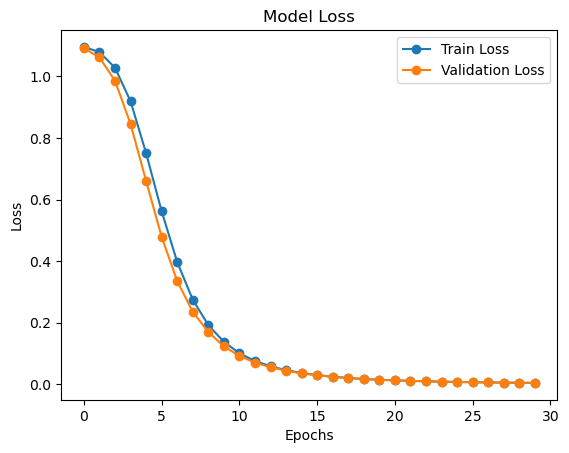

In [12]:
import matplotlib.pyplot as plt
# Plot Training & Validation Accuracy
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# Plot Training & Validation Loss
# plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
